### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import glob

### Leitura das bases de dados

In [2]:
df_cadastral = pd.read_csv('./datasets/CADASTRAL.csv')
df_campanhas = pd.read_csv('./datasets/CAMPANHAS.csv')
df_compras = pd.read_csv('./datasets/COMPRAS.csv')
df_liquidados = pd.read_csv('./datasets/LIQUIDADOS.csv')
df_pre_negados = pd.read_csv('./datasets/PRE_NEGADOS.csv')
df_reclamacoes = pd.read_csv('./datasets/RECLAMACOES.csv')

In [3]:
df_cadastral.head()

,cliente_id,sexo,idade,faixa_etaria,estado,cidade,escolaridade,profissao,estado_civil,renda_mensal,score_inicial,tipo_cliente,n_dependentes,canal_captacao,status_cadastro
0,C000000,Feminino,23,18-24,PE,Olinda,Superior,Comerciante,Casado(a),3507.09,475,Potencial,0,Indicação,Inativo
1,C000001,Masculino,22,18-24,PE,Outros,Pós-graduação,Auxiliar de Serviços Gerais,Solteiro(a),2831.55,584,Tradicional,2,Loja física,Bloqueado
2,C000002,Masculino,18,18-24,PE,Garanhuns,Fundamental,Autônomo,Casado(a),1500.00,300,Potencial,2,Indicação,Inativo
3,C000003,Masculino,37,35-44,PE,Paulista,Fundamental,Comerciante,Solteiro(a),2085.33,338,Tradicional,3,Loja física,Inativo
4,C000004,Masculino,74,60+,PE,Recife,Médio,Vendedor(a),Casado(a),1500.00,562,Potencial,2,Indicação,Bloqueado


In [4]:
df_cadastral.tail()

,cliente_id,sexo,idade,faixa_etaria,estado,cidade,escolaridade,profissao,estado_civil,renda_mensal,score_inicial,tipo_cliente,n_dependentes,canal_captacao,status_cadastro
149995,C149995,Feminino,53,45-59,PE,Jaboatão dos Guararapes,Médio,Autônomo,Casado(a),2257.84,479,Potencial,0,Indicação,Inativo
149996,C149996,Masculino,32,25-34,PE,Recife,Fundamental,Agricultor(a),Casado(a),1500.00,319,Tradicional,0,Loja física,Inativo
149997,C149997,Masculino,57,45-59,PE,Recife,Fundamental,Técnico de Enfermagem,Solteiro(a),1833.74,432,Potencial,1,Indicação,Inativo
149998,C149998,Feminino,32,25-34,PE,Jaboatão dos Guararapes,Fundamental,Auxiliar de Serviços Gerais,Casado(a),1500.00,386,Potencial,1,Indicação,Inativo
149999,C149999,Masculino,28,25-34,PE,Olinda,Superior,Comerciante,Casado(a),2607.89,550,Potencial,1,Indicação,Bloqueado


In [5]:
df_campanhas.head()

,cliente_id,data_envio,tema_campanha,canal,abriu,clicou,converteu_em_compra
0,C039242,2025-03-25,Compre e Ganhe,WhatsApp,Sim,Sim,Não
1,C118819,2023-10-19,Cashback,SMS,Não,Não,Não
2,C114009,2024-04-01,Cashback,SMS,Sim,Não,Sim
3,C101599,2024-03-21,Desconto Exclusivo,Email,Sim,Sim,Sim
4,C088611,2024-12-27,Novo Produto,WhatsApp,Sim,Não,Não


In [6]:
df_campanhas.tail()

,cliente_id,data_envio,tema_campanha,canal,abriu,clicou,converteu_em_compra
99995,C091496,2024-07-28,Compre e Ganhe,Email,Não,Não,Não
99996,C018907,2024-07-07,Lançamento de Linha,SMS,Não,Não,Não
99997,C055989,2024-07-14,Novo Produto,Email,Não,NaN,Não
99998,C138030,2023-12-15,Lançamento de Linha,WhatsApp,Sim,Sim,Não
99999,C107245,2023-12-31,Novo Produto,Notificação App,Sim,Não,Não


In [7]:
df_compras.head()

,cliente_id,data_compra,valor_compra,categoria,canal_compra,status_entrega,forma_pagamento,parcelado,quantidade_parcelas
0,C121958,2024-09-25,169.17,Alimentos,Presencial,Entregue,Pix,Sim,4
1,C146867,2024-04-29,73.34,Higiene Pessoal,Presencial,Entregue,Débito,Sim,2
2,C131932,2023-09-11,151.52,Bebidas,Online,Entregue,Pix,Não,1
3,C103694,2024-01-04,626.98,Utilidades Domésticas,Online,Entregue,Pix,Sim,4
4,C119879,2024-11-04,524.60,Utilidades Domésticas,Presencial,Entregue,Boleto,Sim,2


In [8]:
df_compras.tail()

,cliente_id,data_compra,valor_compra,categoria,canal_compra,status_entrega,forma_pagamento,parcelado,quantidade_parcelas
139995,C025506,2025-05-08,162.15,Higiene Pessoal,Presencial,Entregue,Boleto,Não,1
139996,C125019,2025-05-10,410.64,Utilidades Domésticas,Presencial,Entregue,Cartão,Sim,3
139997,C142979,2023-11-17,161.87,Limpeza,Online,Atrasado,Pix,Não,1
139998,C072486,2023-09-21,213.83,Higiene Pessoal,Presencial,Entregue,Pix,Sim,4
139999,C147626,2023-08-16,128.21,Limpeza,Aplicativo,Entregue,Pix,Sim,2


In [9]:
df_liquidados.head()

,cliente_id,data_pagamento,valor_original,valor_pago,atraso_em_dias,forma_pagamento,situacao_pagamento
0,C059770,2024-05-12,2311.12,1825.02,54,Cartão de Crédito,PARCIAL
1,C021362,2024-03-14,3528.95,3528.95,22,Cartão de Crédito,PAGO
2,C127324,2024-03-15,1669.74,1669.74,29,PIX,PAGO
3,C140509,2024-05-21,4896.25,4896.25,8,Boleto,PAGO
4,C144297,2024-01-30,3873.90,3873.90,6,Débito em Conta,PAGO


In [10]:
df_liquidados.tail()

,cliente_id,data_pagamento,valor_original,valor_pago,atraso_em_dias,forma_pagamento,situacao_pagamento
112495,C129989,2024-04-29,1726.15,1726.15,20,PIX,PAGO
112496,C121633,2024-01-29,2208.56,2208.56,24,Boleto,PAGO
112497,C031872,2024-01-24,1725.12,533.33,36,Débito em Conta,PARCIAL
112498,C141471,2024-02-27,2648.36,906.39,35,Cartão de Crédito,PARCIAL
112499,C036144,2024-02-18,3400.88,0.00,40,Boleto,EM ABERTO


In [11]:
df_pre_negados.head()

,cliente_id,data_solicitacao,valor_solicitado,finalidade_credito,motivo_negativa,tentou_novamente
0,C121598,2024-03-24,2342.40,Empréstimo Pessoal,Renda Insuficiente,Não
1,C040441,2023-12-24,2989.24,Compra Parcelada,Histórico de Inadimplência,Não
2,C009340,2024-09-13,1363.82,Cartão de Crédito,Histórico de Inadimplência,Não
3,C113649,2024-06-03,1832.73,Cartão de Crédito,Histórico de Inadimplência,Sim
4,C029388,2024-01-07,1745.75,Cartão de Crédito,Documentação Incompleta,Sim


In [12]:
df_pre_negados.tail()

,cliente_id,data_solicitacao,valor_solicitado,finalidade_credito,motivo_negativa,tentou_novamente
29995,C120933,2025-06-09,4175.03,Compra Parcelada,Inconsistência Cadastral,Não
29996,C037096,2025-06-10,1988.57,Cartão de Crédito,Histórico de Inadimplência,Não
29997,C130515,2023-11-03,1341.74,Limite Conta,Documentação Incompleta,Não
29998,C064336,2025-05-22,1899.31,Empréstimo Pessoal,Renda Insuficiente,Sim
29999,C034951,2024-07-24,2949.46,Cartão de Crédito,Renda Insuficiente,Sim


In [13]:
df_reclamacoes.head()

,cliente_id,data_reclamacao,tipo_reclamacao,canal_reclamacao,tempo_resposta_dias,status_reclamacao,reincidente
0,C004645,2023-11-17,Cobrança Indevida,SAC,11.0,Finalizada,Sim
1,C047423,2023-12-09,Cobrança Indevida,Aplicativo,7.0,Aberta,Não
2,C075337,2023-08-18,Atendimento Ruim,Aplicativo,2.5,Encerrada sem Resolução,Não
3,C030874,2024-01-26,Atraso na Entrega,SAC,3.3,Em Atendimento,Não
4,C088451,2025-04-12,Atraso na Entrega,Aplicativo,2.2,Finalizada,Não


In [14]:
df_reclamacoes.tail()

,cliente_id,data_reclamacao,tipo_reclamacao,canal_reclamacao,tempo_resposta_dias,status_reclamacao,reincidente
119995,C133360,2024-08-08,Atraso na Entrega,Aplicativo,1.4,Finalizada,Não
119996,C044953,2024-10-22,Cobrança Indevida,E-mail,7.2,Encerrada sem Resolução,Não
119997,C145302,2023-08-01,Produto Errado,Loja Física,10.6,Finalizada,Sim
119998,C099535,2025-04-14,Atraso na Entrega,SAC,1.2,Finalizada,Não
119999,C059113,2024-05-29,Produto Errado,Aplicativo,12.4,Em Atendimento,Não


### Explorando os Dados do Dataframe CADASTRAL


In [15]:
# Conhecendo os valores não nulos e tipos de dados por coluna.
df_cadastral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   cliente_id       150000 non-null  object 
 1   sexo             150000 non-null  object 
 2   idade            150000 non-null  int64  
 3   faixa_etaria     150000 non-null  object 
 4   estado           150000 non-null  object 
 5   cidade           150000 non-null  object 
 6   escolaridade     150000 non-null  object 
 7   profissao        150000 non-null  object 
 8   estado_civil     150000 non-null  object 
 9   renda_mensal     150000 non-null  float64
 10  score_inicial    150000 non-null  int64  
 11  tipo_cliente     150000 non-null  object 
 12  n_dependentes    150000 non-null  int64  
 13  canal_captacao   150000 non-null  object 
 14  status_cadastro  150000 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 17.2+ MB


In [16]:
# Trazendo as estatísticas do nosso dataframe
df_cadastral.describe()

,idade,renda_mensal,score_inicial,n_dependentes
count,150000.000000,150000.000000,150000.000000,150000.000000
mean,39.285667,2369.561071,454.403853,1.497413
std,16.245469,832.909666,86.518448,1.207544
min,18.000000,1500.000000,300.000000,0.000000
25%,27.000000,1609.657500,391.000000,1.000000
50%,36.000000,2192.755000,446.000000,1.000000
75%,49.000000,2868.442500,509.000000,2.000000
max,84.000000,6777.480000,848.000000,5.000000


In [17]:
# Conhecendo os tipos de dados
df_cadastral.dtypes

cliente_id          object
sexo                object
idade                int64
faixa_etaria        object
estado              object
cidade              object
escolaridade        object
profissao           object
estado_civil        object
renda_mensal       float64
score_inicial        int64
tipo_cliente        object
n_dependentes        int64
canal_captacao      object
status_cadastro     object
dtype: object

In [18]:
# Verificando se há dados nulos, não há dados nulos
df_cadastral.isnull().sum()

cliente_id         0
sexo               0
idade              0
faixa_etaria       0
estado             0
cidade             0
escolaridade       0
profissao          0
estado_civil       0
renda_mensal       0
score_inicial      0
tipo_cliente       0
n_dependentes      0
canal_captacao     0
status_cadastro    0
dtype: int64

In [19]:
# Verificando se há dados duplicados, não há dados duplicados
df_cadastral.duplicated().sum()

np.int64(0)

OBS: Coluna de Faixa Etária está com 5 opções de acordo com a idade do cliente
(Avaliar como irei tratar, talvez substituir ou por uma vogal (A,B,C,D,E ou transformar em numérica 1,2,3,4,5))
Não há valores ausentes
Coluna de renda está com (.), substituir por vírgula.

In [20]:
# Está com ponto, só vou conseguir mudar posteriormente
df_cadastral.head()

,cliente_id,sexo,idade,faixa_etaria,estado,cidade,escolaridade,profissao,estado_civil,renda_mensal,score_inicial,tipo_cliente,n_dependentes,canal_captacao,status_cadastro
0,C000000,Feminino,23,18-24,PE,Olinda,Superior,Comerciante,Casado(a),3507.09,475,Potencial,0,Indicação,Inativo
1,C000001,Masculino,22,18-24,PE,Outros,Pós-graduação,Auxiliar de Serviços Gerais,Solteiro(a),2831.55,584,Tradicional,2,Loja física,Bloqueado
2,C000002,Masculino,18,18-24,PE,Garanhuns,Fundamental,Autônomo,Casado(a),1500.00,300,Potencial,2,Indicação,Inativo
3,C000003,Masculino,37,35-44,PE,Paulista,Fundamental,Comerciante,Solteiro(a),2085.33,338,Tradicional,3,Loja física,Inativo
4,C000004,Masculino,74,60+,PE,Recife,Médio,Vendedor(a),Casado(a),1500.00,562,Potencial,2,Indicação,Bloqueado


### Segmentando o dataframe "CADASTRAL" e construindo os perfis dos clientes

1- Relação da Renda Mensal e Score dos Clientes

In [22]:
# Avaliando as medidas estatísticas das colunas Score Inicial e Renda Mensal, preferi trazer a função "describe" ao calcular função por função uma a uma ex:mean,std, min, max...
df_cadastral[['score_inicial', 'renda_mensal']].describe()

,score_inicial,renda_mensal
count,150000.000000,150000.000000
mean,454.403853,2369.561071
std,86.518448,832.909666
min,300.000000,1500.000000
25%,391.000000,1609.657500
50%,446.000000,2192.755000
75%,509.000000,2868.442500
max,848.000000,6777.480000


In [23]:
# default = Pearson
r = df_cadastral['renda_mensal'].corr(df_cadastral['score_inicial'])
print(f"r = {r:.2f}")

r = 0.43


1- Visualizando a Distribuição

C:\Users\Maíra\AppData\Local\Temp\ipykernel_7048\2364217979.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


<Axes: xlabel='renda_mensal', ylabel='score_inicial'>

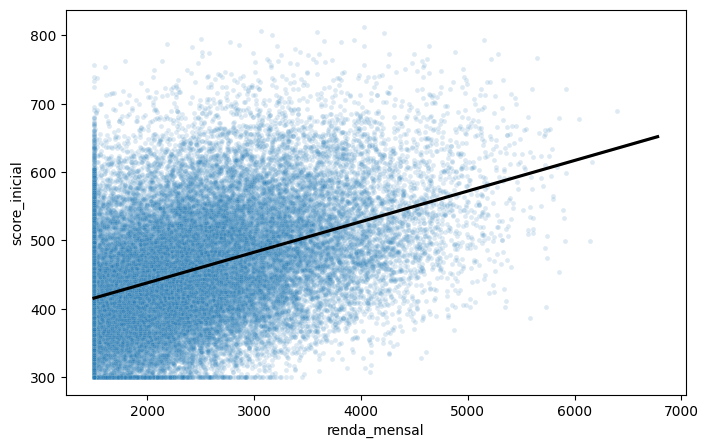

In [25]:
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df_cadastral.sample(40_000, random_state=42), # amostra grande, mas não toda a base
    x="renda_mensal",
    y="score_inicial",
    palette="Set2",
    alpha=0.15, # transparência -> menos sobreposição
    s=12 # tamanho do ponto
)

# Adicionando linha de tendência global
sns.regplot(
    data=df_cadastral,
    x="renda_mensal",
    y="score_inicial",
    scatter=False,
    color="black"
)

1.1 O coeficiente de correlação ficou em torno de +0,43 que é uma relação positiva, porém apenas moderada.
Isso juda a ter um score maior, porém mais da metade da variação do score está vindo de outros fatores.

In [26]:
# Definindo quartis reais do SCORE e criar rótulos claros
score_edges = df_cadastral['score_inicial'].quantile([0, .25, .50, .75, 1]).values
# exemplo típico: [300, 402, 446, 491, 848]

score_labels = [
    f"{int(score_edges[0])}–{int(score_edges[1])}",                 # 300–402
    f"{int(score_edges[1])+1}–{int(score_edges[2])}",               # 403–446
    f"{int(score_edges[2])+1}–{int(score_edges[3])}",               # 447–491
    f"{int(score_edges[3])+1}–{int(score_edges[4])}"                # 492–848
]

df_cadastral['faixa_score'] = pd.cut(df_cadastral['score_inicial'],
                           bins=score_edges,
                           labels=score_labels,
                           include_lowest=True)

In [27]:
# Quartis de RENDA (labels mantidos simples R1–R4)
df_cadastral['faixa_renda'] = pd.qcut(df_cadastral['renda_mensal'], 4,
                            labels=['R1','R2','R3','R4'])

# Tabela de distribuição
contagem   = pd.crosstab(df_cadastral['faixa_score'], df_cadastral['faixa_renda'])
percentual = (contagem.div(contagem.sum(axis=1), axis=0) * 100).round(1)

print("\nContagem de clientes\n", contagem)
print("\nPercentual dentro de cada faixa de score\n", percentual)


Contagem de clientes
 faixa_renda     R1     R2     R3     R4
faixa_score                            
300–391      15451  12044   7605   2924
392–446      10819  10679   9439   6348
447–509       7421   8831  10276  10707
510–848       3809   5946  10180  17521

Percentual dentro de cada faixa de score
 faixa_renda    R1    R2    R3    R4
faixa_score                        
300–391      40.6  31.7  20.0   7.7
392–446      29.0  28.6  25.3  17.0
447–509      19.9  23.7  27.6  28.8
510–848      10.2  15.9  27.2  46.8


In [28]:
score_edges = df_cadastral['score_inicial'].quantile([0, 0.25, 0.5, 0.75, 1.0]).values
renda_edges = df_cadastral['renda_mensal'].quantile([0, 0.25, 0.5, 0.75, 1.0]).values

# Monta os labels e as faixas
quartis = ['Q1', 'Q2', 'Q3', 'Q4']
score_ranges = [f"{score_edges[i]:.2f} – {score_edges[i+1]:.2f}" for i in range(4)]
renda_ranges = [f"{renda_edges[i]:.2f} – {renda_edges[i+1]:.2f}" for i in range(4)]

# Cria DataFrame de saída
df_ranges = pd.DataFrame({
    'quartil': quartis,
    'score_inicial': score_ranges,
    'renda_mensal': renda_ranges
})
print(df_ranges)

  quartil    score_inicial       renda_mensal
0      Q1  300.00 – 391.00  1500.00 – 1609.66
1      Q2  391.00 – 446.00  1609.66 – 2192.76
2      Q3  446.00 – 509.00  2192.76 – 2868.44
3      Q4  509.00 – 848.00  2868.44 – 6777.48


1.2 À medida que o score aumenta, a renda também. No quartil mais alto de score (510-848), quase 50 % dos clientes estão também no quartil mais alto de renda; já no quartil mais baixo de score essa fatia não chega a 10 %. Isso significa que, ao concentrar crédito nos clientes de score alto, estou trazendo clientes de menor risco e maior capacidade de pagamento.

2-Relação de número de dependentes e Score


In [30]:
# Avaliando as medidas estatísticas de ambas
df_cadastral[['score_inicial', 'n_dependentes']].describe()

,score_inicial,n_dependentes
count,150000.000000,150000.000000
mean,454.403853,1.497413
std,86.518448,1.207544
min,300.000000,0.000000
25%,391.000000,1.000000
50%,446.000000,1.000000
75%,509.000000,2.000000
max,848.000000,5.000000


In [31]:
# Correlação linear
r = df_cadastral['n_dependentes'].corr(df_cadastral['score_inicial'])
print(f'Correlação de Pearson (n_dependentes × score_inicial): {r:.2f}')

# Score médio por quantidade de dependentes
print("\nScore médio por nº de dependentes:")
print(df_cadastral.groupby('n_dependentes')['score_inicial'].mean().round(0))

Correlação de Pearson (n_dependentes × score_inicial): 0.00

Score médio por nº de dependentes:
n_dependentes
0    454.0
1    454.0
2    455.0
3    456.0
4    453.0
5    451.0
Name: score_inicial, dtype: float64


2-Visualizando a distribuição

C:\Users\Maíra\AppData\Local\Temp\ipykernel_7048\3501983179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cadastral, x='n_dependentes', y='score_inicial', palette="Pastel1")


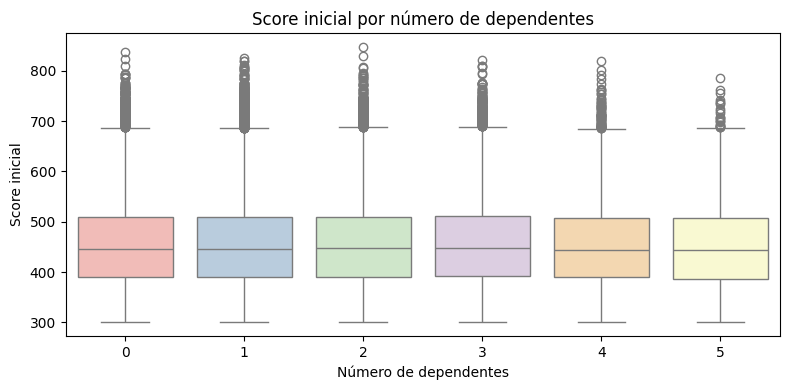

In [32]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df_cadastral, x='n_dependentes', y='score_inicial', palette="Pastel1")
plt.title('Score inicial por número de dependentes')
plt.xlabel('Número de dependentes'); plt.ylabel('Score inicial')
plt.tight_layout(); plt.show()

2.2 O número de dependentes não impacta o score de forma significativa nesta análise, na análise seguinte irei analisar a renda per capita, dessa forma não vale a pena incluí-lo como um marcador principal de risco ou limite de crédito, pois não agrega poder preditivo visível sobre o score interno.

3- Calculando Renda Per Capta

In [33]:
df_cadastral.drop(columns='renda_mensal_fmt', errors='ignore', inplace=True)

In [34]:
df_cadastral['renda_per_capita'] = (
    df_cadastral['renda_mensal'] / (df_cadastral['n_dependentes'] + 1)
).round(2)

In [35]:
print(df_cadastral[['renda_mensal', 'n_dependentes', 'renda_per_capita']].head())

   renda_mensal  n_dependentes  renda_per_capita
0       3507.09              0           3507.09
1       2831.55              2            943.85
2       1500.00              2            500.00
3       2085.33              3            521.33
4       1500.00              2            500.00


In [36]:
# Nova coluna com a renda per capta foi adicionada
df_cadastral.head()

,cliente_id,sexo,idade,faixa_etaria,estado,cidade,escolaridade,profissao,estado_civil,renda_mensal,score_inicial,tipo_cliente,n_dependentes,canal_captacao,status_cadastro,faixa_score,faixa_renda,renda_per_capita
0,C000000,Feminino,23,18-24,PE,Olinda,Superior,Comerciante,Casado(a),3507.09,475,Potencial,0,Indicação,Inativo,447–509,R4,3507.09
1,C000001,Masculino,22,18-24,PE,Outros,Pós-graduação,Auxiliar de Serviços Gerais,Solteiro(a),2831.55,584,Tradicional,2,Loja física,Bloqueado,510–848,R3,943.85
2,C000002,Masculino,18,18-24,PE,Garanhuns,Fundamental,Autônomo,Casado(a),1500.00,300,Potencial,2,Indicação,Inativo,300–391,R1,500.00
3,C000003,Masculino,37,35-44,PE,Paulista,Fundamental,Comerciante,Solteiro(a),2085.33,338,Tradicional,3,Loja física,Inativo,300–391,R2,521.33
4,C000004,Masculino,74,60+,PE,Recife,Médio,Vendedor(a),Casado(a),1500.00,562,Potencial,2,Indicação,Bloqueado,510–848,R1,500.00


In [37]:
# Avaliando o tipo da variável para os cálculos posteriores
df_cadastral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   cliente_id        150000 non-null  object  
 1   sexo              150000 non-null  object  
 2   idade             150000 non-null  int64   
 3   faixa_etaria      150000 non-null  object  
 4   estado            150000 non-null  object  
 5   cidade            150000 non-null  object  
 6   escolaridade      150000 non-null  object  
 7   profissao         150000 non-null  object  
 8   estado_civil      150000 non-null  object  
 9   renda_mensal      150000 non-null  float64 
 10  score_inicial     150000 non-null  int64   
 11  tipo_cliente      150000 non-null  object  
 12  n_dependentes     150000 non-null  int64   
 13  canal_captacao    150000 non-null  object  
 14  status_cadastro   150000 non-null  object  
 15  faixa_score       150000 non-null  category
 16  fa

3.1 A renda per capta é um importante marcador e estou trazendo para a minha análise pois é um retrato mais fiel da capacidade de pagamento de cada cliente porque já desconta o efeito do tamanho da família (risco de inadiplência). Conversa diretamente com a minha meta de pré-aprovar crédito sem elevar a inadimplência.
 O score capta histórico; RPC captura fôlego financeiro presente.

4- Score por Renda Per Capta e e Canal de Captação

In [38]:
df_cadastral[['renda_per_capita', 'score_inicial']].describe()

,renda_per_capita,score_inicial
count,150000.000000,150000.000000
mean,1226.248586,454.403853
std,818.350369,86.518448
min,250.000000,300.000000
25%,667.130000,391.000000
50%,960.005000,446.000000
75%,1510.910000,509.000000
max,6463.080000,848.000000


In [39]:
# Canal de captação é uma variável do tipo texto
df_cadastral['canal_captacao'].value_counts()

canal_captacao
Loja física         52499
App                 44814
Indicação           29957
Campanha digital    22730
Name: count, dtype: int64

In [40]:
# default = Pearson
r = df_cadastral['renda_per_capita'].corr(df_cadastral['score_inicial'])
print(f"r = {r:.2f}")

r = 0.23


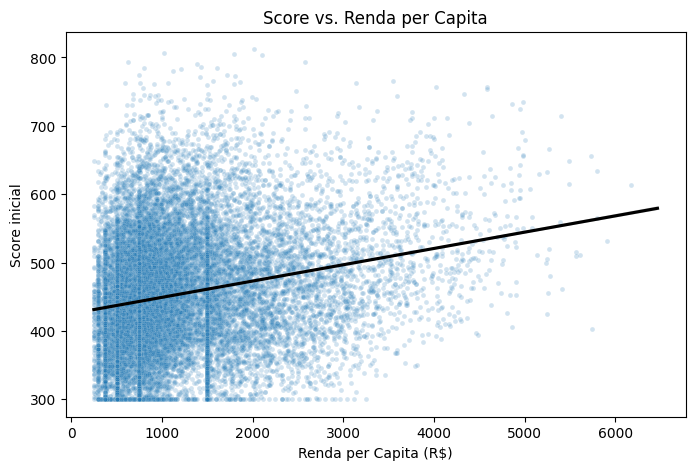

In [41]:
if 'renda_per_capita' not in df_cadastral.columns:
    df_cadastral['renda_per_capita'] = df_cadastral['renda_mensal'] / (df_cadastral['n_dependentes'] + 1)

# Scatter simplificado (amostra de 20k pontos para leveza)
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_cadastral.sample(20_000, random_state=42),
                x='renda_per_capita', y='score_inicial',
                alpha=0.20, s=12)
sns.regplot(data=df_cadastral, x='renda_per_capita', y='score_inicial',
            scatter=False, color='black') # linha de tendência
plt.title('Score vs. Renda per Capita')
plt.xlabel('Renda per Capita (R$)')
plt.ylabel('Score inicial')
plt.show()

4.1 A correlação de 0,23 confirma que renda per capita é importante mas não decisiva, reforça a política de crédito ao diferenciar capacidade de pagamento dentro de faixas de risco parecidas.